## Get list of images


In [1]:
import json

# Path to your JSON file
file_path = '/workspace/datasets/coco_minitrain_25k/annotations/instances_minitrain2017.json'

# Open and load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

data['images']

[{'license': 1,
  'file_name': '000000231538.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000231538.jpg',
  'height': 640,
  'width': 476,
  'date_captured': '2013-11-18 12:00:52',
  'flickr_url': 'http://farm4.staticflickr.com/3142/2804610447_ec49815f83_z.jpg',
  'id': 231538},
 {'license': 5,
  'file_name': '000000322749.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000322749.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-19 21:13:16',
  'flickr_url': 'http://farm5.staticflickr.com/4093/4915514425_9e5338fb29_z.jpg',
  'id': 322749},
 {'license': 3,
  'file_name': '000000318299.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000318299.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-17 17:58:55',
  'flickr_url': 'http://farm4.staticflickr.com/3781/9068155095_7ac8f8ef74_z.jpg',
  'id': 318299},
 {'license': 3,
  'file_name': '000000025290.jpg',
  'coco_url': 'http://images.cocodataset.org/train20

In [2]:
len(data['images'])

25000

## Get Mapping of Class Index to Class Label

In [3]:
import json

# Specify the filename (or path) to your JSON file
filename = "idx_to_label.json"

# Load the dictionary from the JSON file
with open(filename, 'r') as f:
    idx_to_label = json.load(f)

idx_to_label = {int(k): v for k, v in idx_to_label.items()}



In [4]:
idx_to_label[0]

'person'

## Load Image and Annotations from mini-coco dataset

In [5]:
import pandas as pd
df = pd.DataFrame(data['images'])
df

,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,1,000000231538.jpg,http://images.cocodataset.org/train2017/000000...,640,476,2013-11-18 12:00:52,http://farm4.staticflickr.com/3142/2804610447_...,231538
1,5,000000322749.jpg,http://images.cocodataset.org/train2017/000000...,427,640,2013-11-19 21:13:16,http://farm5.staticflickr.com/4093/4915514425_...,322749
2,3,000000318299.jpg,http://images.cocodataset.org/train2017/000000...,480,640,2013-11-17 17:58:55,http://farm4.staticflickr.com/3781/9068155095_...,318299
3,3,000000025290.jpg,http://images.cocodataset.org/train2017/000000...,426,640,2013-11-14 20:23:19,http://farm1.staticflickr.com/33/55074253_6d39...,25290
4,3,000000020276.jpg,http://images.cocodataset.org/train2017/000000...,428,640,2013-11-21 00:30:10,http://farm5.staticflickr.com/4132/5048683260_...,20276
...,...,...,...,...,...,...,...,...
24995,4,000000465301.jpg,http://images.cocodataset.org/train2017/000000...,375,500,2013-11-21 21:00:16,http://farm5.staticflickr.com/4010/4386991761_...,465301
24996,3,000000281503.jpg,http://images.cocodataset.org/train2017/000000...,427,640,2013-11-22 22:33:06,http://farm4.staticflickr.com/3642/3921330424_...,281503
24997,3,000000260893.jpg,http://images.cocodataset.org/train2017/000000...,425,640,2013-11-24 20:40:46,http://farm6.staticflickr.com/5241/5373688358_...,260893
24998,4,000000405192.jpg,http://images.cocodataset.org/train2017/000000...,640,427,2013-11-20 15:08:16,http://farm5.staticflickr.com/4086/5043933537_...,405192


## Run YOLO inference to get results from model

In [6]:
import cv2
from ultralytics import YOLO
from tqdm.auto import tqdm

model = YOLO("yolov8n.pt")

In [7]:
det_boxes = []
det_confidences = []
det_class_ids = []
filename = []
id = []

df = df.head(10)

img_path = '/workspace/datasets/coco_minitrain_25k/images/train2017/'
for row in tqdm(df.itertuples(), desc="Processing", total=len(df), unit=" imgs"):
    image_path = img_path + row.file_name
    image = cv2.imread(image_path)
    results = model(image, verbose=False)[0]

    filename.append(row.file_name)
    id.append(row.id) 
    det_boxes.append(results.boxes.xywh.cpu().numpy())
    det_confidences.append(results.boxes.conf.cpu().numpy())
    det_class_ids.append(results.boxes.cls.cpu().numpy())


Processing:   0%|          | 0/10 [00:00<?, ? imgs/s]

In [8]:
yolo_detections_df = pd.DataFrame({'filename': filename, 
                                   'id':id,
                                   'det_boxes': det_boxes, 
                                   'det_conf': det_confidences, 
                                   'det_category_id': det_class_ids})

yolo_detections_df['det_boxes'] = yolo_detections_df['det_boxes'].apply(lambda x: [[round(float(y), 2) for y in sublist] for sublist in x])
yolo_detections_df['det_conf'] = yolo_detections_df['det_conf'].apply(lambda x: [round(num, 4) for num in x])
yolo_detections_df['det_category_id'] = yolo_detections_df['det_category_id'].apply(lambda x: [int(num) for num in x])


yolo_detections_df

,filename,id,det_boxes,det_conf,det_category_id
0,000000231538.jpg,231538,"[[369.12, 374.82, 94.64, 367.55], [275.72, 360...","[0.8767, 0.8523, 0.7863, 0.7315, 0.6548, 0.618...","[0, 0, 0, 28, 0, 24, 28, 0, 28]"
1,000000322749.jpg,322749,"[[194.15, 80.24, 183.24, 151.9], [582.14, 249....","[0.7612, 0.7044, 0.5148, 0.4506, 0.4182, 0.326...","[50, 50, 51, 50, 50, 51, 51]"
2,000000318299.jpg,318299,"[[458.6, 221.3, 362.52, 239.65], [178.15, 203....","[0.9268, 0.8947, 0.2532]","[7, 7, 7]"
3,000000025290.jpg,25290,"[[460.87, 165.48, 334.83, 326.56], [540.66, 33...","[0.9171, 0.8854]","[0, 36]"
4,000000020276.jpg,20276,"[[292.33, 211.56, 211.44, 191.84], [177.89, 30...","[0.8757, 0.8557]","[0, 37]"
5,000000209692.jpg,209692,"[[300.59, 310.68, 539.63, 444.07], [10.65, 354...","[0.4623, 0.3321, 0.3156, 0.2726]","[7, 2, 2, 2]"
6,000000437607.jpg,437607,"[[125.74, 204.09, 250.82, 164.99], [312.54, 19...","[0.859, 0.7791, 0.4693]","[6, 6, 6]"
7,000000116389.jpg,116389,"[[320.8, 254.33, 68.39, 165.1]]",[0.8327],[0]
8,000000347238.jpg,347238,"[[516.3, 222.73, 246.89, 271.71], [318.07, 199...","[0.8545, 0.7607, 0.7547, 0.7325, 0.4696, 0.453...","[20, 20, 0, 0, 0, 0, 0, 0, 0, 20]"
9,000000129801.jpg,129801,"[[413.43, 200.07, 234.65, 232.24], [183.83, 21...","[0.9217, 0.86, 0.8424, 0.3653, 0.3583, 0.2736]","[5, 7, 0, 0, 0, 0]"


In [9]:
yolo_detections_df = yolo_detections_df.apply(pd.Series.explode)
yolo_detections_df.rename(columns={'id': 'image_id'}, inplace=True)
yolo_detections_df

,filename,image_id,det_boxes,det_conf,det_category_id
0,000000231538.jpg,231538,"[369.12, 374.82, 94.64, 367.55]",0.8767,0
0,000000231538.jpg,231538,"[275.72, 360.12, 117.38, 313.49]",0.8523,0
0,000000231538.jpg,231538,"[144.19, 267.04, 30.54, 96.76]",0.7863,0
0,000000231538.jpg,231538,"[286.19, 538.9, 123.33, 85.47]",0.7315,28
0,000000231538.jpg,231538,"[183.74, 267.33, 36.12, 87.47]",0.6548,0
0,000000231538.jpg,231538,"[191.79, 550.25, 88.6, 109.13]",0.6182,24
0,000000231538.jpg,231538,"[102.13, 523.47, 194.88, 161.48]",0.5247,28
0,000000231538.jpg,231538,"[212.96, 262.37, 23.27, 77.72]",0.4913,0
0,000000231538.jpg,231538,"[285.47, 487.12, 123.05, 191.52]",0.3377,28
1,000000322749.jpg,322749,"[194.15, 80.24, 183.24, 151.9]",0.7612,50


In [10]:
yolo_detections_df['det_category_label'] = yolo_detections_df['det_category_id'].map(idx_to_label)
yolo_detections_df

,filename,image_id,det_boxes,det_conf,det_category_id,det_category_label
0,000000231538.jpg,231538,"[369.12, 374.82, 94.64, 367.55]",0.8767,0,person
0,000000231538.jpg,231538,"[275.72, 360.12, 117.38, 313.49]",0.8523,0,person
0,000000231538.jpg,231538,"[144.19, 267.04, 30.54, 96.76]",0.7863,0,person
0,000000231538.jpg,231538,"[286.19, 538.9, 123.33, 85.47]",0.7315,28,suitcase
0,000000231538.jpg,231538,"[183.74, 267.33, 36.12, 87.47]",0.6548,0,person
0,000000231538.jpg,231538,"[191.79, 550.25, 88.6, 109.13]",0.6182,24,backpack
0,000000231538.jpg,231538,"[102.13, 523.47, 194.88, 161.48]",0.5247,28,suitcase
0,000000231538.jpg,231538,"[212.96, 262.37, 23.27, 77.72]",0.4913,0,person
0,000000231538.jpg,231538,"[285.47, 487.12, 123.05, 191.52]",0.3377,28,suitcase
1,000000322749.jpg,322749,"[194.15, 80.24, 183.24, 151.9]",0.7612,50,broccoli


YOLO outputs bbox in cxcywh format. We need to convert it into xywh format

In [11]:
def convert_cxcywh_to_xywh(box):
    cx, cy, w, h = box
    x = cx - w / 2
    y = cy - h / 2
    return [x, y, w, h]

yolo_detections_df['det_boxes'] = yolo_detections_df['det_boxes'].apply(convert_cxcywh_to_xywh)

In [12]:
yolo_detections_df

,filename,image_id,det_boxes,det_conf,det_category_id,det_category_label
0,000000231538.jpg,231538,"[321.8, 191.045, 94.64, 367.55]",0.8767,0,person
0,000000231538.jpg,231538,"[217.03000000000003, 203.375, 117.38, 313.49]",0.8523,0,person
0,000000231538.jpg,231538,"[128.92, 218.66000000000003, 30.54, 96.76]",0.7863,0,person
0,000000231538.jpg,231538,"[224.525, 496.16499999999996, 123.33, 85.47]",0.7315,28,suitcase
0,000000231538.jpg,231538,"[165.68, 223.59499999999997, 36.12, 87.47]",0.6548,0,person
0,000000231538.jpg,231538,"[147.49, 495.685, 88.6, 109.13]",0.6182,24,backpack
0,000000231538.jpg,231538,"[4.689999999999998, 442.73, 194.88, 161.48]",0.5247,28,suitcase
0,000000231538.jpg,231538,"[201.32500000000002, 223.51, 23.27, 77.72]",0.4913,0,person
0,000000231538.jpg,231538,"[223.94500000000002, 391.36, 123.05, 191.52]",0.3377,28,suitcase
1,000000322749.jpg,322749,"[102.53, 4.289999999999992, 183.24, 151.9]",0.7612,50,broccoli


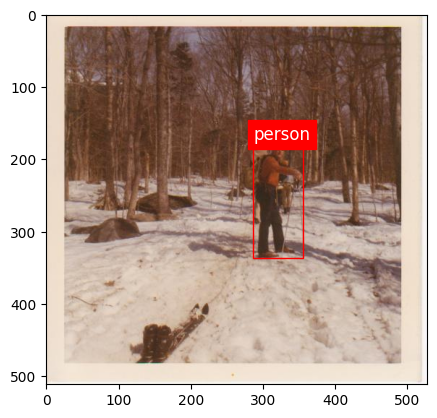

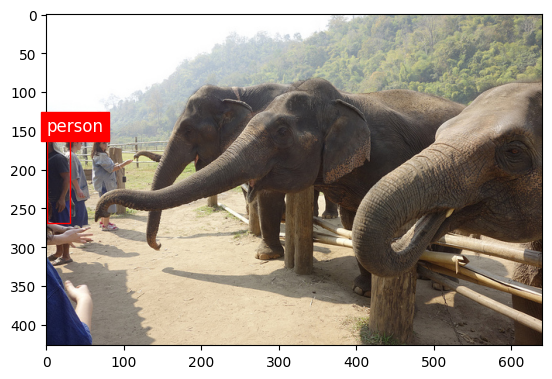

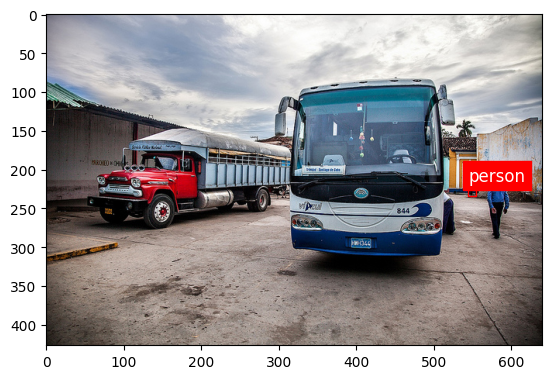

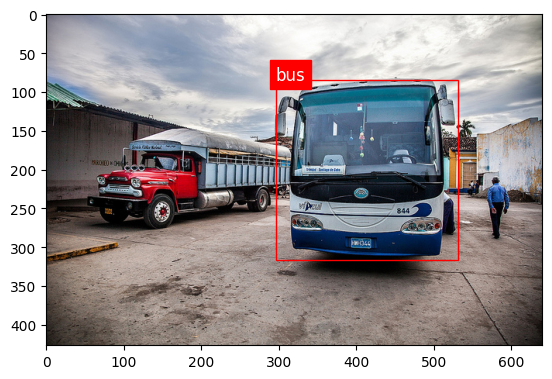

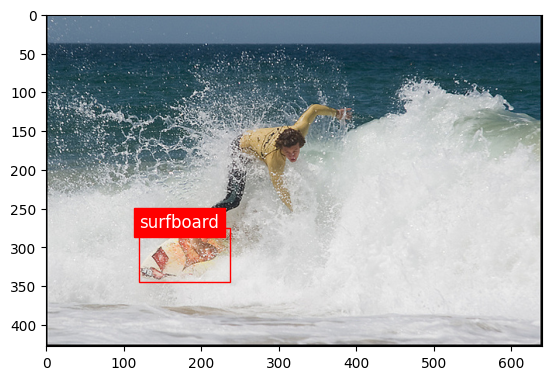

In [17]:
# Plot to check if detections and conversions are right

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


for index, row in yolo_detections_df.sample(5).iterrows():

    filename_path = img_path + row['filename']
    img = Image.open(filename_path)

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    x, y, w, h = row['det_boxes']
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none', label=row['det_category_label'])
    ax.add_patch(rect)
    plt.text(x, y, row['det_category_label'], color='white', fontsize=12, backgroundcolor='red')

plt.show()



## Get GT from annotations

In [18]:
df_annot = pd.DataFrame(data['annotations'])
df_annot # bbox is xywh format

,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[314.97, 458.79, 333.66, 307.78, 326.47, 253....",21914.66615,0,231538,"[314.97, 192.72, 102.11, 366.74]",1,481949
1,"[[269.17, 506.98, 220.49, 509.85, 213.33, 498....",19889.56405,0,231538,"[213.33, 202.02, 117.41, 307.83]",1,498229
2,"[[190.87, 309.05, 183.08, 308.55, 180.06, 305....",1202.36040,0,231538,"[177.8, 225.12, 25.63, 83.93]",1,536668
3,"[[228.79, 516.28, 281.85, 501.31, 287.97, 499....",7523.06275,0,231538,"[227.43, 499.95, 120.41, 80.28]",33,1184351
4,"[[213.11, 306.11, 199.9, 306.72, 202.91, 296.5...",1544.49695,0,231538,"[199.9, 221.44, 27.03, 85.28]",1,1238132
...,...,...,...,...,...,...,...
183541,"[[391.96, 59.55, 396.04, 50.02, 392.64, 44.58,...",1510.91595,0,405192,"[386.52, 0.36, 40.48, 65.99]",1,1687726
183542,"[[28.86, 2.36, 21.92, 28.14, 40.75, 44.0, 78.4...",39808.83950,0,405192,"[21.92, 0.0, 354.91, 180.81]",1,1712286
183543,"[[640.0, 277.24, 594.08, 276.16, 583.32, 282.6...",22042.70610,0,381107,"[224.93, 171.77, 415.07, 125.92]",5,158060
183544,"[[66.03, 239.2, 96.23, 239.2, 101.62, 232.73, ...",170.60765,0,381107,"[66.03, 232.73, 35.59, 11.87]",5,158614


In [19]:
# In the annotations, the index class starts from 1. In yolo it starts from 0. Let standardize them.
df_annot['category_id'] = df_annot['category_id'] - 1
df_annot

,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[314.97, 458.79, 333.66, 307.78, 326.47, 253....",21914.66615,0,231538,"[314.97, 192.72, 102.11, 366.74]",0,481949
1,"[[269.17, 506.98, 220.49, 509.85, 213.33, 498....",19889.56405,0,231538,"[213.33, 202.02, 117.41, 307.83]",0,498229
2,"[[190.87, 309.05, 183.08, 308.55, 180.06, 305....",1202.36040,0,231538,"[177.8, 225.12, 25.63, 83.93]",0,536668
3,"[[228.79, 516.28, 281.85, 501.31, 287.97, 499....",7523.06275,0,231538,"[227.43, 499.95, 120.41, 80.28]",32,1184351
4,"[[213.11, 306.11, 199.9, 306.72, 202.91, 296.5...",1544.49695,0,231538,"[199.9, 221.44, 27.03, 85.28]",0,1238132
...,...,...,...,...,...,...,...
183541,"[[391.96, 59.55, 396.04, 50.02, 392.64, 44.58,...",1510.91595,0,405192,"[386.52, 0.36, 40.48, 65.99]",0,1687726
183542,"[[28.86, 2.36, 21.92, 28.14, 40.75, 44.0, 78.4...",39808.83950,0,405192,"[21.92, 0.0, 354.91, 180.81]",0,1712286
183543,"[[640.0, 277.24, 594.08, 276.16, 583.32, 282.6...",22042.70610,0,381107,"[224.93, 171.77, 415.07, 125.92]",4,158060
183544,"[[66.03, 239.2, 96.23, 239.2, 101.62, 232.73, ...",170.60765,0,381107,"[66.03, 232.73, 35.59, 11.87]",4,158614


In [20]:
# Drop unnecssary columns and rename for clarity.

df_annot = df_annot[['image_id', 'bbox', 'category_id']]
df_annot.rename(columns={'bbox':'true_bbox', 'category_id':'true_category_id'}, inplace=True)
df_annot

/tmp/ipykernel_3060/2504949157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annot.rename(columns={'bbox':'true_bbox', 'category_id':'true_category_id'}, inplace=True)


,image_id,true_bbox,true_category_id
0,231538,"[314.97, 192.72, 102.11, 366.74]",0
1,231538,"[213.33, 202.02, 117.41, 307.83]",0
2,231538,"[177.8, 225.12, 25.63, 83.93]",0
3,231538,"[227.43, 499.95, 120.41, 80.28]",32
4,231538,"[199.9, 221.44, 27.03, 85.28]",0
...,...,...,...
183541,405192,"[386.52, 0.36, 40.48, 65.99]",0
183542,405192,"[21.92, 0.0, 354.91, 180.81]",0
183543,381107,"[224.93, 171.77, 415.07, 125.92]",4
183544,381107,"[66.03, 232.73, 35.59, 11.87]",4


## Merge into a dataframe

In [ ]:
merged_df = pd.merge(yolo_detections_df, df_annot, on='image_id', how='inner')

# Reorder the columns to match the specified order
merged_df = merged_df[['filename', 'image_id', 'true_bbox', 'true_category_id', 'det_boxes', 'det_conf', 'det_category_id']]
merged_df

In [ ]:
merged_df['det_category_label'] = merged_df['det_category_id'].map(idx_to_label)
merged_df['true_category_label'] = merged_df['true_category_id'].map(idx_to_label)

In [ ]:
merged_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


def draw_bbox(ax, bbox, edgecolor, label):
    # Draw a bounding box with the specified parameters
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor=edgecolor, facecolor='none', label=label)
    ax.add_patch(rect)

def plot_bboxes(row):
    # Open the image
    image = Image.open(img_path+row['filename'])
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Directly use the bounding box values
    true_bbox = row['true_bbox']
    det_boxes = row['det_boxes']

    # Draw true and detected bounding boxes
    draw_bbox(ax, true_bbox, 'g', f'True: {row["true_category_label"]}')
    draw_bbox(ax, det_boxes, 'r', f'Detected: {row["det_category_label"]}')

    # Legend
    plt.legend(loc='upper right')
    plt.show()

# Plot bounding boxes for each row in the dataframe
for index, row in merged_df.head(5).iterrows():
    # Convert string representations of lists to actual lists if they are strings
    if isinstance(row['true_bbox'], str):
        row['true_bbox'] = eval(row['true_bbox'])
    if isinstance(row['det_boxes'], str):
        row['det_boxes'] = eval(row['det_boxes'])

    plot_bboxes(row)
